# IMPORTS

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,roc_auc_score,roc_curve,precision_score,recall_score,balanced_accuracy_score,top_k_accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import preprocessing
from xgboost import XGBClassifier

# Task 01

In [37]:
trainDataset = pd.read_csv('train.csv')
testDataset = pd.read_csv('test.csv')

print(trainDataset.info())
print("\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [38]:
print(testDataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [39]:
#Check Missing Values If Any
print(trainDataset.isnull().sum())
print("\n\n")
print(testDataset.isnull().sum())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64



id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
tota

In [51]:
# Check Shapes of datasets

print(f"Train Data Shape: {trainDataset.shape}")
print(f"Test Data Shape: {testDataset.shape}")

Train Data Shape: (4250, 20)
Test Data Shape: (750, 20)


Class distribution in training set:
churn
0    3652
1     598
Name: count, dtype: int64


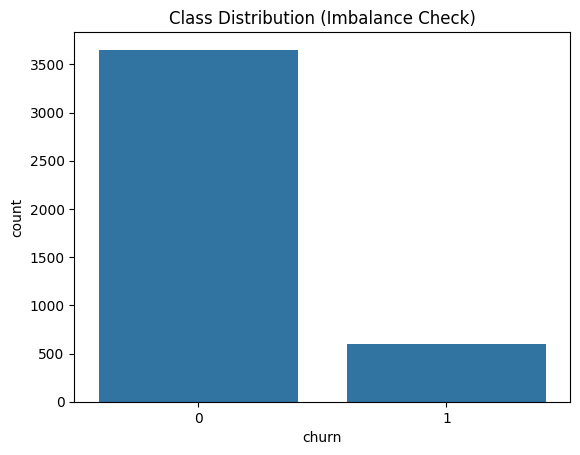

In [50]:
# Check class distribution in the target variable
print("Class distribution in training set:")
print(trainDataset['churn'].value_counts())

# Visualize class imbalance
sns.countplot(x='churn', data=trainDataset)
plt.title('Class Distribution (Imbalance Check)')
plt.show()

In [40]:
#Label Encoding For Categorical Features!!
label = LabelEncoder()

for col in trainDataset.select_dtypes(include='object').columns:
    trainDataset[col] = label.fit_transform(trainDataset[col])

for col in testDataset.select_dtypes(include='object').columns:
    testDataset[col] = label.fit_transform(testDataset[col])
    
print(trainDataset)
print(testDataset)

      state  account_length  area_code  international_plan  voice_mail_plan  \
0        35             107          1                   0                1   
1        31             137          1                   0                0   
2        35              84          0                   1                0   
3        36              75          1                   1                0   
4        19             121          2                   0                1   
...     ...             ...        ...                 ...              ...   
4245     26              83          1                   0                0   
4246     49              73          0                   0                0   
4247     27              75          0                   0                0   
4248     11              50          0                   0                1   
4249     46              86          1                   0                1   

      number_vmail_messages  total_day_minutes  tot

In [41]:
#Scale Numericl Features
scaler = StandardScaler()

numerical_cols = trainDataset.select_dtypes(include=['int64', 'float64']).columns

trainDataset[numerical_cols] = scaler.fit_transform(trainDataset[numerical_cols])
testDataset[numerical_cols] = scaler.transform(testDataset[numerical_cols])

In [42]:
#Splitting and Model Training

X = trainDataset.drop('churn',axis=1)
Y = trainDataset['churn']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.8,random_state=48)

randomClassifier = RandomForestClassifier(random_state=42)
randomClassifier.fit(X_train,Y_train)

predict = randomClassifier.predict(X_test)
predictProba = randomClassifier.predict_proba(X_test)[:,1]

Accuracy Score : 0.9276470588235294


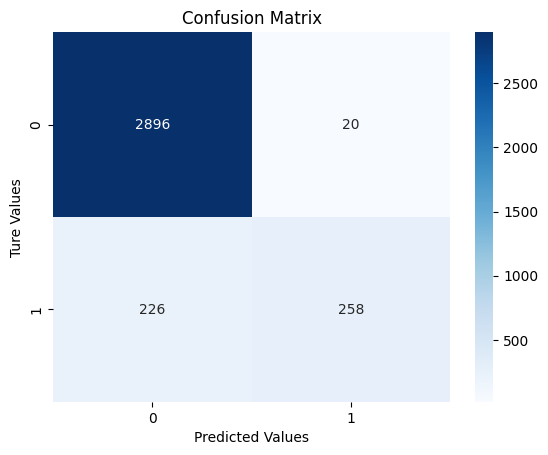




TP: 258, TN: 2896, FP: 20, FN: 226
F1-Score : 0.6771653543307087


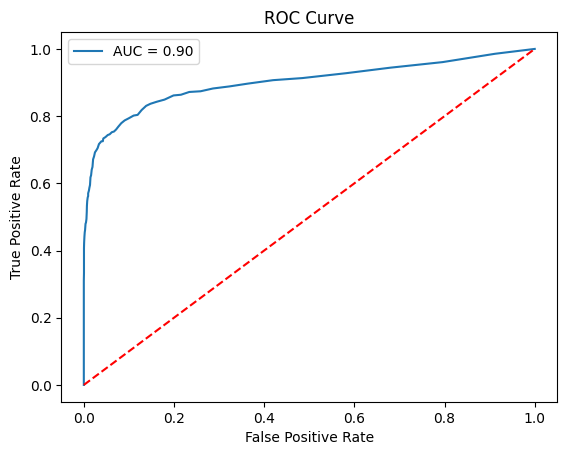

ROc Auc Score : 0.8997345792379463


In [48]:
accuracy = accuracy_score(Y_test,predict)
print(f"Accuracy Score : {accuracy}")

conMat = confusion_matrix(Y_test,predict)
sns.heatmap(conMat,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Ture Values')
plt.xlabel('Predicted Values')
plt.show()
print("\n\n")
TN, FP, FN, TP = conMat.ravel()
print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')

f1Score = f1_score(Y_test,predict)
print(f"F1-Score : {f1Score}")

rocAuc = roc_auc_score(Y_test,predictProba)
fpr, tpr, thresholds = roc_curve(Y_test, predictProba)

plt.plot(fpr, tpr, label=f'AUC = {rocAuc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"ROc Auc Score : {rocAuc}")


# Task 02

In [55]:
dataset = pd.read_csv('Task2\diabetes_prediction_dataset.csv')
dataset.info()
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Shape Of Dataset : (100000, 9)
Class distribution in training set:
diabetes
0    91500
1     8500
Name: count, dtype: int64


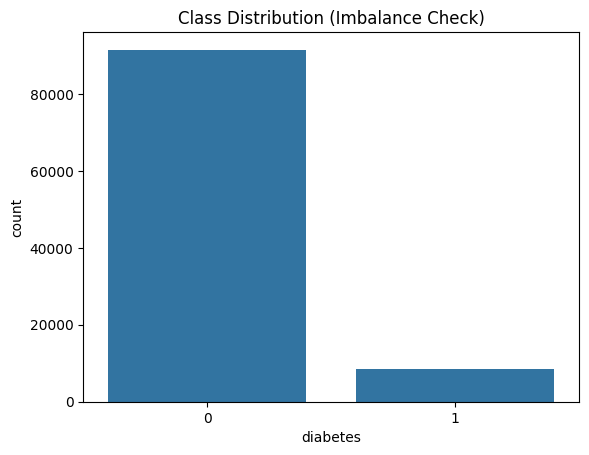

In [58]:
print(dataset.isnull().sum())
print(f"\nShape Of Dataset : {dataset.shape}")

# Check class distribution in the target variable
print("Class distribution in training set:")
print(dataset['diabetes'].value_counts())

# Visualize class imbalance
sns.countplot(x='diabetes', data=dataset)
plt.title('Class Distribution (Imbalance Check)')
plt.show()

In [59]:
#Label Encoding On Categorical Features

lebel = LabelEncoder()

for col in dataset.select_dtypes(include='object').columns:
    dataset[col] = lebel.fit_transform(dataset[col])
    
print(dataset)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                 

In [67]:
X = dataset.drop('diabetes',axis=1)
Y = dataset['diabetes']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=48)

randomClassifier = RandomForestClassifier(random_state=48)
knn = KNeighborsClassifier(n_neighbors=5)

randomClassifier.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

randPred = randomClassifier.predict(X_test)
randPredProba = randomClassifier.predict_proba(X_test)[:,1]

knnPred = knn.predict(X_test)
knnPredProba = knn.predict_proba(X_test)[:,1]

print(f"===============Metrices For KNN===============\n")
print(f"Accuracy Score : {accuracy_score(Y_test,knnPred)}")
print(f"F1-Score : {f1_score(Y_test,knnPred)}")
print(f"Precission : {precision_score(Y_test,knnPred)}")
print(f"Recall : {recall_score(Y_test,knnPred)}")

print(f"\n===============Metrices For Random Forest===============\n")
print(f"Accuracy Score : {accuracy_score(Y_test,randPred)}")
print(f"F1-Score : {f1_score(Y_test,randPred)}")
print(f"Precission : {precision_score(Y_test,randPred)}")
print(f"Recall : {recall_score(Y_test,randPred)}")





===============Metrices For KNN===============

Accuracy Score : 0.9538
F1-Score : 0.6732673267326733
Precission : 0.8872320596458527
Recall : 0.5424501424501424

===============Metrices For Random Forest===============

Accuracy Score : 0.9701
F1-Score : 0.8035479632063075
Precission : 0.9487975174553918
Recall : 0.6968660968660969


In [63]:
#Knn and Random Forest With StratifiedKfold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

rfCVScores = cross_val_score(randomClassifier, X, Y, cv=skf, scoring='precision')
knnCVScores = cross_val_score(knn, X, Y, cv=skf, scoring='precision')

print(f"Average Precision for Random Forest: {rfCVScores.mean()}")
print(f"Average Precision for KNN: {knnCVScores.mean()}")


Average Precision for Random Forest: 0.9458259980986028
Average Precision for KNN: 0.8724115563317973


In [65]:
#comparisions Between Train_Test and CVScores
print(f"Accuracy Score (Train_Test_Split): {accuracy_score(Y_test,knnPred)}")
print(f"Accuracy Score (Train_Test_Split): {accuracy_score(Y_test,randPred)}")

print(f"\nAverage Precision for Random Forest: {rfCVScores.mean()}")
print(f"Average Precision for KNN: {knnCVScores.mean()}")

Accuracy Score (Train_Test_Split): 0.9538
Accuracy Score (Train_Test_Split): 0.9701

Average Precision for Random Forest: 0.9458259980986028
Average Precision for KNN: 0.8724115563317973


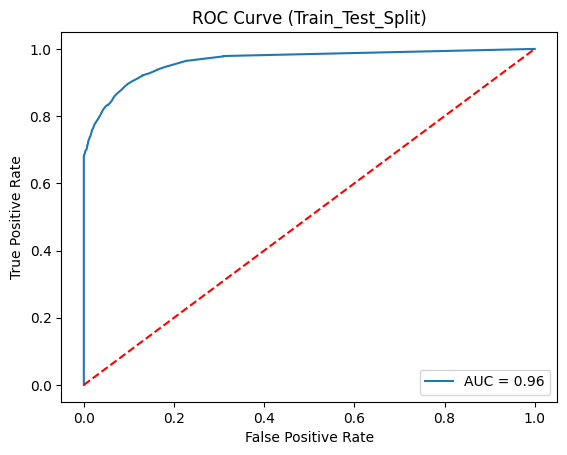

Random Forest (CV) Average ROC AUC: 0.95


In [73]:
rocAuc = roc_auc_score(Y_test,randPredProba)
fpr,tpr,thresholds = roc_curve(Y_test,randPredProba)

plt.plot(fpr,tpr,label=f'AUC = {rocAuc:.2f}')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train_Test_Split)')
plt.legend()
plt.show()

print(f'Random Forest (CV) Average ROC AUC: {rfCVScores.mean():.2f}')

In [77]:
# Calculate balanced accuracy for Random Forest
balancedAcc = balanced_accuracy_score(Y_test,randPred)
print(f"Balanced Accuracy (Random Forest): {balancedAcc}")

# Calculate top-k accuracy for Random Forest (example with k=3)
topKAcc = top_k_accuracy_score(Y_test,randPredProba,k=3)
print(f"Top-K Accuracy (Random Forest, k=3): {topKAcc}")


Balanced Accuracy (Random Forest): 0.8466243337166879
Top-K Accuracy (Random Forest, k=3): 1.0


C:\Users\Fast123\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1988: UndefinedMetricWarning: 'k' (3) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


# Task 03

In [80]:
# Data Exploration and Preprocessing

dataset = pd.read_csv('Task3\WineQT.csv')
dataset.info()
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides 

In [81]:
print(dataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


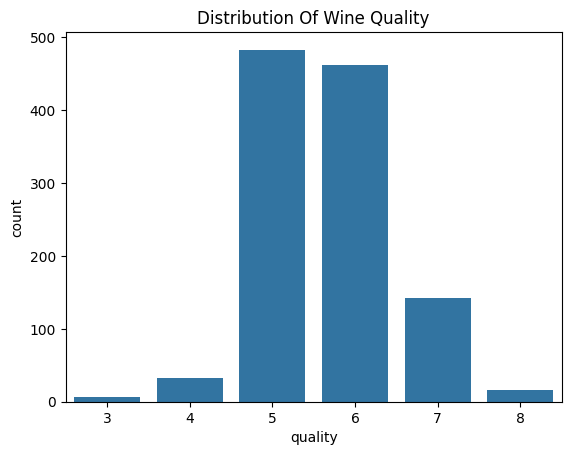

In [82]:
#Null Values and Class imbalance

print(dataset.isnull().sum())

sns.countplot(x='quality',data=dataset)
plt.title('Distribution Of Wine Quality')
plt.show()

In [85]:
#Model Building and Evaluation

scaler = StandardScaler()
X = dataset.drop('quality', axis=1)
Y = dataset['quality']

X_scaled = scaler.fit_transform(X)
randomClassifier = RandomForestClassifier(random_state=42)


In [94]:
#Before Handling imbalance Values
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
randomClassifier.fit(X_train,Y_train)
randPred = randomClassifier.predict(X_test)

print(f"Accuracy Score : {accuracy_score(Y_test, randPred)}")
print(f"F1-Score : {f1_score(Y_test, randPred, average='macro')}")
print(f"Precision : {precision_score(Y_test, randPred, average='macro')}")
print(f"Recall : {recall_score(Y_test, randPred, average='macro')}")

Accuracy Score : 0.6855895196506551
F1-Score : 0.412098382167032
Precision : 0.42272727272727273
Recall : 0.4067987567987569


C:\Users\Fast123\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [98]:
# Handling imbalanced classes using SMOTE (if needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)

#After Handling imbalance Values
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=42)
randomClassifier.fit(X_train,Y_train)
randPred = randomClassifier.predict(X_test)

print(f"Accuracy Score : {accuracy_score(Y_test, randPred)}")
print(f"F1-Score : {f1_score(Y_test, randPred, average='macro')}")
print(f"Precision : {precision_score(Y_test, randPred, average='macro')}")
print(f"Recall : {recall_score(Y_test, randPred, average='macro')}")

#Metrices Improved After Balancing Dataset!!

Accuracy Score : 0.8724137931034482
F1-Score : 0.873540860163251
Precision : 0.8724193278989651
Recall : 0.8766599217447806


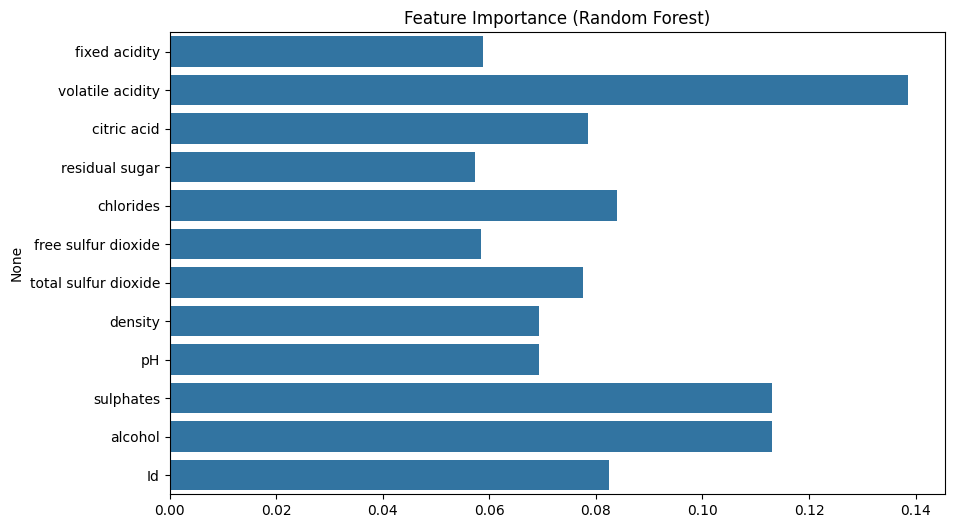

In [99]:
# Feature importance for Random Forest
importances = randomClassifier.feature_importances_
featureNames = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=featureNames)
plt.title('Feature Importance (Random Forest)')
plt.show()

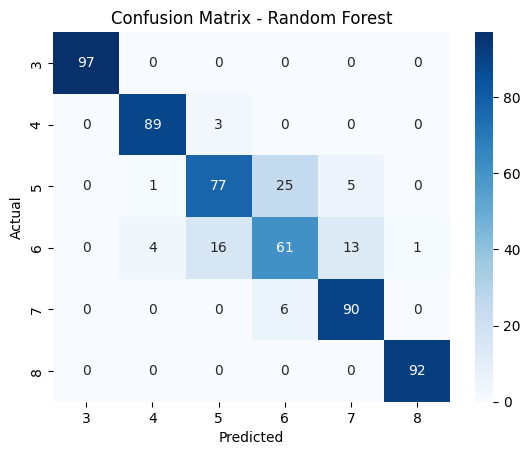

In [101]:
#Confusion Matrix
conMat = confusion_matrix(Y_test,randPred)
sns.heatmap(conMat,annot=True,fmt='d',cmap='Blues',xticklabels=np.unique(randPred),yticklabels=np.unique(Y_test))
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [102]:
# Binary Classification (Quality >= 5 is considered high quality, others are low quality)
dataset['quality'] = dataset['quality'].apply(lambda x: 1 if x >= 5 else 0)

# Check new binary labels
print(dataset['quality'].value_counts())


quality
1    1104
0      39
Name: count, dtype: int64


# Task 04

In [ ]:
# No Model Training in Lab1

# Lab02

In [114]:
from sklearn.feature_selection import RFE
empDataset = pd.read_csv('employee_survey.csv')

print(empDataset.isnull().sum())

empDataset['Age'] = empDataset['Age'].fillna(empDataset['Age'].mean())
empDataset['TrainingHoursPerYear'] = empDataset['TrainingHoursPerYear'].fillna(empDataset['TrainingHoursPerYear'].mode()[0])

targetColumns = ['EmpID','Gender','MaritalStatus','JobLevel','Dept','EmpType','PhysicalActivityHours','CommuteMode','EduLevel','haveOT']
X = empDataset.drop(columns=targetColumns)
Y = empDataset['JobSatisfaction']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = RandomForestClassifier()

rfe = RFE(estimator=model, n_features_to_select=10)

rfe.fit(X_train, Y_train)

yPred = rfe.predict(X_test)

ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)
print("Feature Rankings:", ranking)

print(f"Accuracy Score : {accuracy_score(Y_test, yPred)}")
print(f"F1-Score : {f1_score(Y_test, yPred, average='macro')}")


# Classification Report
classReport = classification_report(Y_test, yPred)
print("Classification Report:\n", classReport)

# Confusion Matrix
conMatrix = confusion_matrix(Y_test, yPred)
print("Confusion Matrix:\n", conMatrix)

# Assuming a multi-class classification problem, adjust this to get specific values:
# Get the elements you need from the matrix (example for 5x5 matrix)
tn = conMatrix[0, 0]  
fp = np.sum(conMatrix[0, 1:]) 
fn = np.sum(conMatrix[1:, 0])  
tp = np.sum(conMatrix[1:, 1:])
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Precision, Recall, and Specificity
print(f"Precision : {precision_score(Y_test, yPred, average='macro')}")
print(f"Recall : {recall_score(Y_test, yPred, average='macro')}")
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")




EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64
Selected Features: Index(['Age', 'Experience', 'WLB', 'WorkEnv', 'Workload', 'SleepHours',
       'CommuteDistance', 'TeamSize', 'TrainingHoursPerYear',
       'JobSatisfaction'],
      dtype='object')
Feature Rankings: [1 1 1 1 1 2 1 1 3 1 4 1 1]
Accuracy Score : 1.0
F1-Score : 1.0
Classification Report:
               precision    recall  f1-score   support

   

# LAb03

In [116]:
dataset = pd.read_csv('cancer patient data sets.csv')

print("Information: \n",dataset.info())
print("\n\nStatistica Summary: \n",dataset.describe())

dataset = dataset.drop(columns=['Patient Id'])
X = dataset.drop(columns=['Level'])
y = dataset['Level']

# Split the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, random_state=0)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

yPred = knn.predict(X_test)

# Accuracy Scores
testAccuracy = accuracy_score(y_test, yPred)
print("Testing accuracy:", testAccuracy)

# Classification Report 
print("Classification Report (Testing):\n", classification_report(y_test, yPred))

# Confusion Matrix
conMatrix = confusion_matrix(y_test, yPred)  # Changed Y_test to y_test
print("Confusion Matrix:\n", conMatrix)

# Precision, Recall, and Specificity
precision = precision_score(y_test, yPred, average='weighted')
recall = recall_score(y_test, yPred, average='weighted')
specificity = tn / (tn + fp)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

# F1 Score
f1 = f1_score(y_test, yPred, average='weighted')
print(f"F1 Score: {f1:.4f}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

# Lab04

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

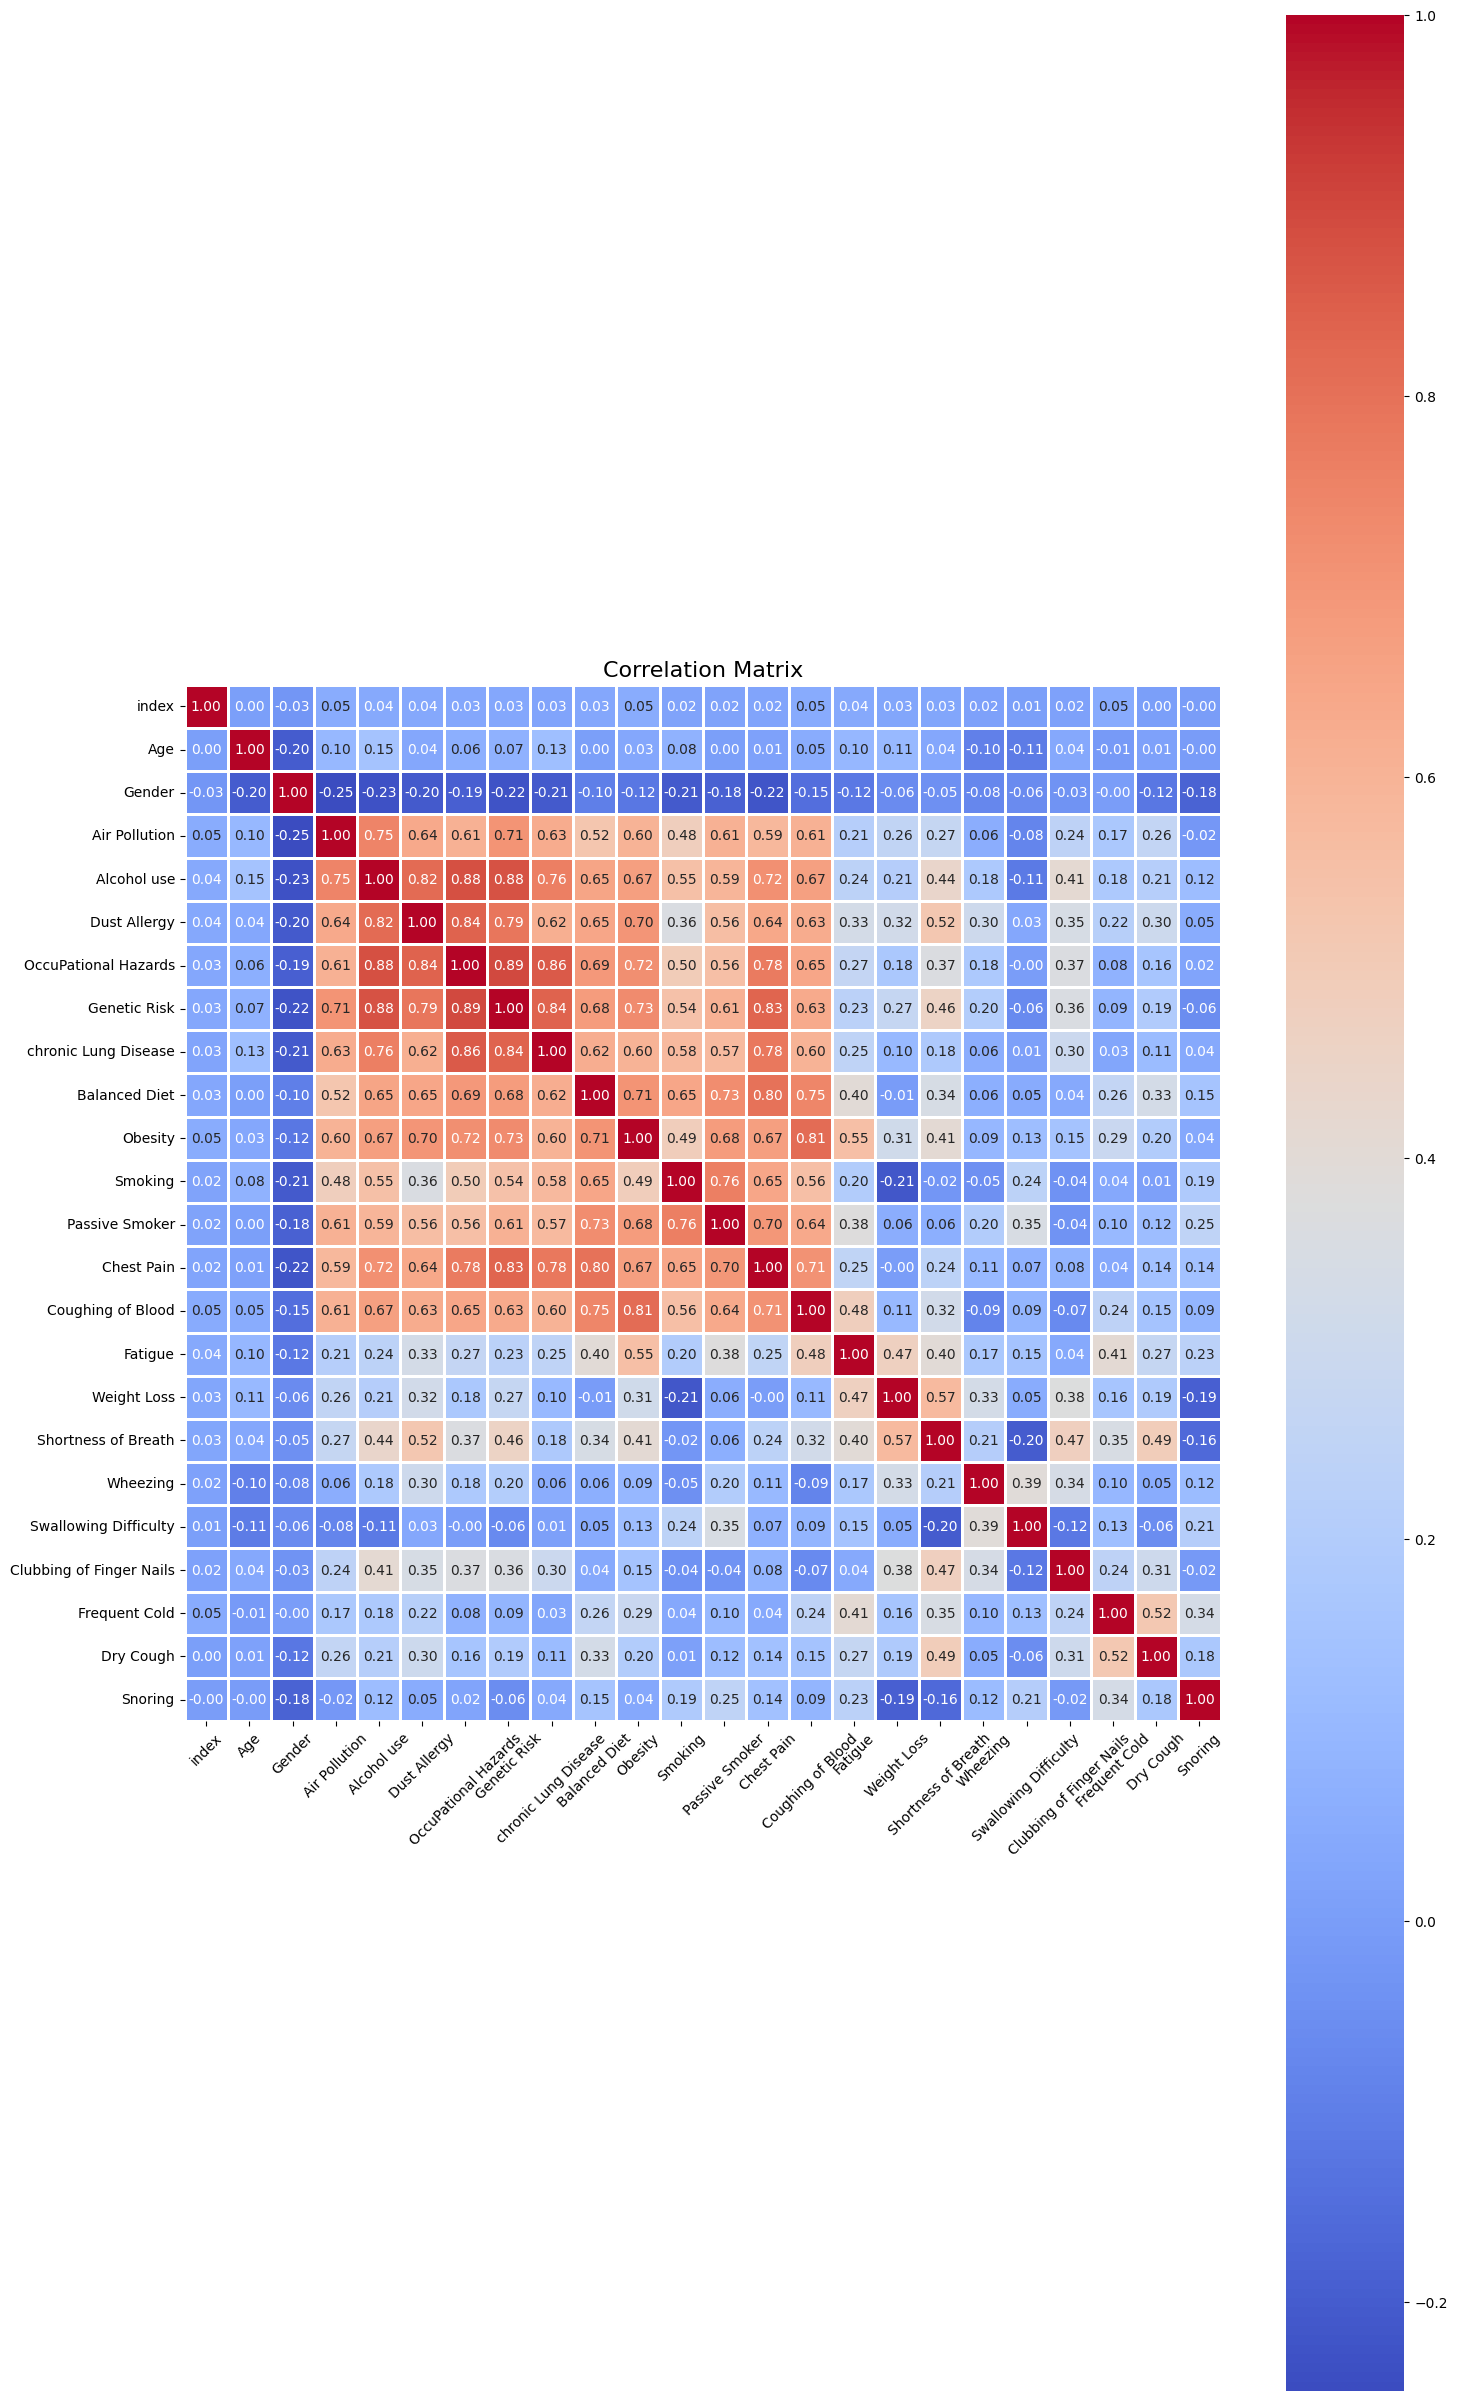

In [117]:
#Almost Same AS Lab 03

dataset = pd.read_csv('cancer patient data sets.csv')

print("Information: \n",dataset.info())
print("\n\nStatistica Summary: \n",dataset.describe())

dataset = dataset.drop(columns=['Patient Id'])
X = dataset.drop(columns=['Level'])
y = dataset['Level']

# Split the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, random_state=0)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

yPred = knn.predict(X_test)

# Accuracy Scores
testAccuracy = accuracy_score(y_test, yPred)
print("Testing accuracy:", testAccuracy)

# Classification Report 
print("Classification Report (Testing):\n", classification_report(y_test, yPred))

# Confusion Matrix
conMatrix = confusion_matrix(y_test, yPred)  # Changed Y_test to y_test
print("Confusion Matrix:\n", conMatrix)

# Precision, Recall, and Specificity
precision = precision_score(y_test, yPred, average='weighted')
recall = recall_score(y_test, yPred, average='weighted')
specificity = tn / (tn + fp)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

# F1 Score
f1 = f1_score(y_test, yPred, average='weighted')
print(f"F1 Score: {f1:.4f}")


numerical_cols = dataset.select_dtypes(include=['number']).columns.tolist()

# Step 2: Compute the correlation matrix
correlation_matrix = dataset[numerical_cols].corr()

plt.figure(figsize=(15,30))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.8)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Lab05

In [120]:
dataset = pd.read_csv('heart.csv')
print(dataset.info())

dataset.drop_duplicates(inplace=True) #DROP DUPLICATES

#Splitting
x = dataset.drop('target', axis = 1)
y = dataset['target']

# Split the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, random_state=0)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
Training set shape: (168, 13)
Validation set shape: (73, 13)
Testing set shape: (61, 13)


# XG Boost

C:\Users\Fast123\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [04:39:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estmators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7869
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.81      0.83      0.82        36

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

Confusion Matrix:
 [[18  7]
 [ 6 30]]
True Positives (TP): 30
True Negatives (TN): 18
False Positives (FP): 7
False Negatives (FN): 6
Precision: 0.7859
Recall: 0.7869
Specificity: 0.7200
F1 Score: 0.7862


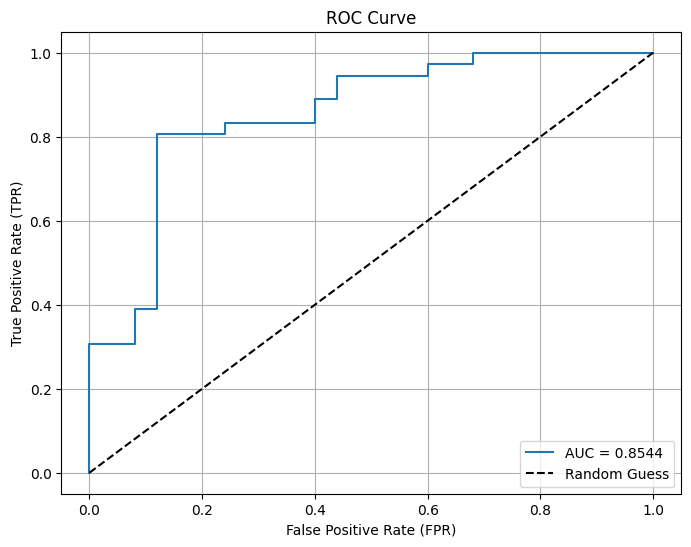

In [121]:
import xgboost as xg
from xgboost import XGBClassifier as xgClassifier

xgClassifier = xgClassifier(n_estmators=100, random_state=0)
xgClassifier.fit(X_train, y_train)

yPred = xgClassifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(Y_test, yPred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
classReport = classification_report(Y_test, yPred)
print("Classification Report:\n", classReport)

# Confusion Matrix
conMatrix = confusion_matrix(Y_test, yPred)
print("Confusion Matrix:\n", conMatrix)

# Extract True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conMatrix.ravel()
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Precision, Recall, and Specificity
precision = precision_score(Y_test, yPred, average='weighted')  # Use 'weighted' if multiple classes
recall = recall_score(Y_test, yPred, average='weighted')
specificity = tn / (tn + fp)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

# F1 Score
f1 = f1_score(Y_test, yPred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Plot AUC ROC Curve (use model.predict_proba instead of RFE)
y_prob = xgClassifier.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
auc_score = roc_auc_score(Y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Random Forest

Accuracy: 0.8197
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.86      0.83      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:
 [[20  5]
 [ 6 30]]
True Positives (TP): 30
True Negatives (TN): 20
False Positives (FP): 5
False Negatives (FN): 6
Precision: 0.8211
Recall: 0.8197
Specificity: 0.8000
F1 Score: 0.8202


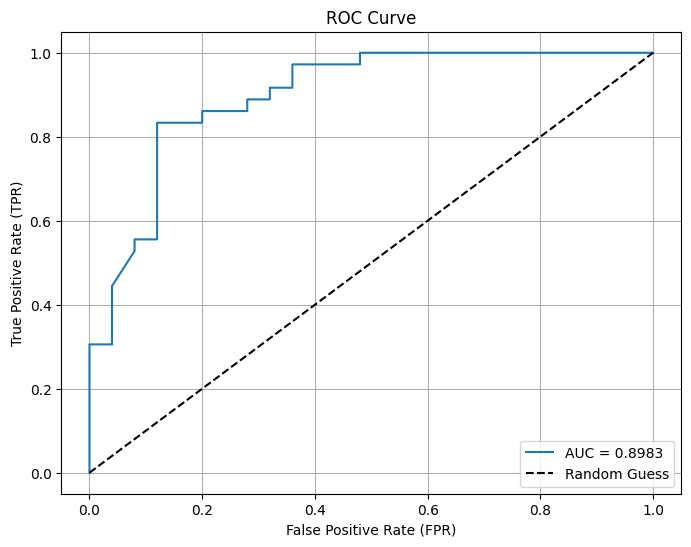

In [122]:
randAcc = []
randomClassifier = RandomForestClassifier(n_estimators=100, random_state=0)
randomClassifier.fit(X_train, y_train)

yPred = randomClassifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(Y_test, yPred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
classReport = classification_report(Y_test, yPred)
print("Classification Report:\n", classReport)

# Confusion Matrix
conMatrix = confusion_matrix(Y_test, yPred)
print("Confusion Matrix:\n", conMatrix)

# Extract True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conMatrix.ravel()
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Precision, Recall, and Specificity
precision = precision_score(Y_test, yPred, average='weighted')  # Use 'weighted' if multiple classes
recall = recall_score(Y_test, yPred, average='weighted')
specificity = tn / (tn + fp)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

# F1 Score
f1 = f1_score(Y_test, yPred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Plot AUC ROC Curve (use model.predict_proba instead of RFE)
y_prob = randomClassifier.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
auc_score = roc_auc_score(Y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# AdaBoost

C:\Users\Fast123\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8033
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.80      0.89      0.84        36

    accuracy                           0.80        61
   macro avg       0.80      0.78      0.79        61
weighted avg       0.80      0.80      0.80        61

Confusion Matrix:
 [[17  8]
 [ 4 32]]
True Positives (TP): 32
True Negatives (TN): 17
False Positives (FP): 8
False Negatives (FN): 4
Precision: 0.8039
Recall: 0.8033
Specificity: 0.6800
F1 Score: 0.7999


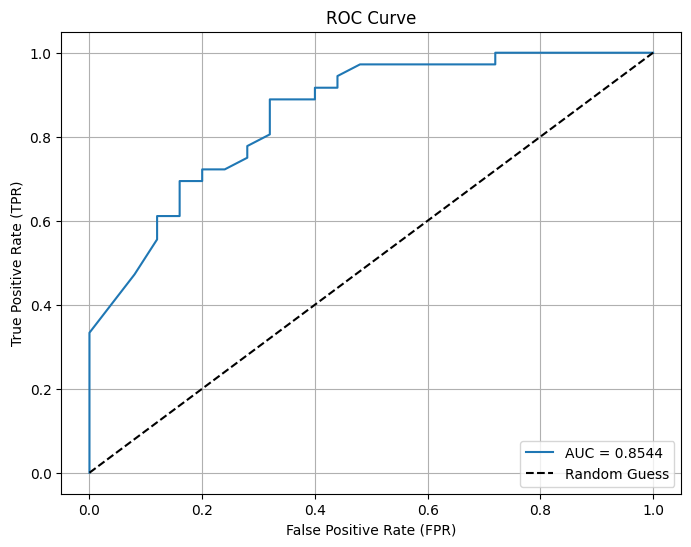

In [123]:
adaAcc = []
adaModel = AdaBoostClassifier(learning_rate= 0.01,random_state=42,n_estimators=100)
adaModel.fit(X_train,y_train)

yPred = adaModel.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(Y_test, yPred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
classReport = classification_report(Y_test, yPred)
print("Classification Report:\n", classReport)

# Confusion Matrix
conMatrix = confusion_matrix(Y_test, yPred)
print("Confusion Matrix:\n", conMatrix)

# Extract True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conMatrix.ravel()
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Precision, Recall, and Specificity
precision = precision_score(Y_test, yPred, average='weighted')  # Use 'weighted' if multiple classes
recall = recall_score(Y_test, yPred, average='weighted')
specificity = tn / (tn + fp)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

# F1 Score
f1 = f1_score(Y_test, yPred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Plot AUC ROC Curve (use model.predict_proba instead of RFE)
y_prob = adaModel.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
auc_score = roc_auc_score(Y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()